In [1]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
import time

In [2]:
def loadImages(dir):
    images = []
    for filename in os.listdir(dir):
        img = cv2.imread(os.path.join(dir,filename))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        if img is not None:
            images.append(img)
    return images

In [3]:
images = loadImages("../../test/dataset")

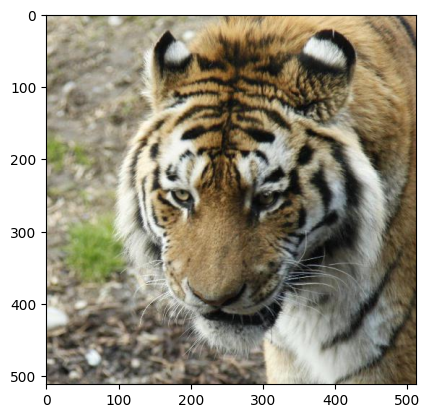

In [4]:
plt.imshow(images[0])

In [5]:
def rgb_to_hsv(img):
    # Normalizing the image
    img = img / 255.0

    r, g, b = img[:, :, 0], img[:, :, 1], img[:, :, 2]
    
    cmax = np.max(img, axis=2); cmin = np.min(img, axis=2)
    delta = cmax - cmin

    # Initialize arrays for H, S, V
    h = np.zeros_like(cmax); s = np.zeros_like(cmax)
    v = cmax

    # Calculate H
    h[(delta != 0) & (cmax == r)] = 60 * (((g - b) / delta) % 6)[((delta != 0) & (cmax == r))]
    h[(delta != 0) & (cmax == g)] = 60 * ((b - r) / delta + 2)[((delta != 0) & (cmax == g))]
    h[(delta != 0) & (cmax == b)] = 60 * ((r - g) / delta + 4)[((delta != 0) & (cmax == b))]

    # Calculate S
    s[cmax != 0] = delta[cmax != 0] / cmax[cmax != 0]

    return np.dstack((h, s, v))

In [6]:
for i in range(len(images)):
        images[i] = rgb_to_hsv(images[i])

C:\Users\mdava\AppData\Local\Temp\ipykernel_3156\1291541088.py:15: RuntimeWarning: invalid value encountered in divide
  h[(delta != 0) & (cmax == r)] = 60 * (((g - b) / delta) % 6)[((delta != 0) & (cmax == r))]
C:\Users\mdava\AppData\Local\Temp\ipykernel_3156\1291541088.py:16: RuntimeWarning: invalid value encountered in divide
  h[(delta != 0) & (cmax == g)] = 60 * ((b - r) / delta + 2)[((delta != 0) & (cmax == g))]
C:\Users\mdava\AppData\Local\Temp\ipykernel_3156\1291541088.py:17: RuntimeWarning: invalid value encountered in divide
  h[(delta != 0) & (cmax == b)] = 60 * ((r - g) / delta + 4)[((delta != 0) & (cmax == b))]


In [7]:
images[0]

array([[[51.        ,  0.1       ,  0.78431373],
        [51.        ,  0.1010101 ,  0.77647059],
        [50.        ,  0.09230769,  0.76470588],
        ...,
        [37.33333333,  0.24324324,  0.7254902 ],
        [34.28571429,  0.2320442 ,  0.70980392],
        [36.58536585,  0.23428571,  0.68627451]],

       [[51.        ,  0.1       ,  0.78431373],
        [51.        ,  0.09950249,  0.78823529],
        [50.        ,  0.09      ,  0.78431373],
        ...,
        [34.46808511,  0.23737374,  0.77647059],
        [36.27906977,  0.22279793,  0.75686275],
        [36.58536585,  0.21925134,  0.73333333]],

       [[51.        ,  0.10050251,  0.78039216],
        [51.        ,  0.0990099 ,  0.79215686],
        [50.        ,  0.08780488,  0.80392157],
        ...,
        [36.73469388,  0.25      ,  0.76862745],
        [33.33333333,  0.23316062,  0.75686275],
        [36.27906977,  0.23243243,  0.7254902 ]],

       ...,

       [[32.72727273,  0.12021858,  0.71764706],
        [32

In [8]:
def hsv_quantify(img):
    h, s, v = img[:, :, 0], img[:, :, 1], img[:, :, 2]

    # Define mapping functions for H, S, and V
    def map_h(h):
        if h <= 25:
            return 1
        elif h <= 40:
            return 2
        elif h <= 120:
            return 3
        elif h <= 190:
            return 4
        elif h <= 270:
            return 5
        elif h <= 295:
            return 6
        elif h <= 315:
            return 7
        else:
            return 0

    def map_sv(value):
        if value < 0.2:
            return 0
        elif value < 0.7:
            return 1
        else:
            return 2

    # Applying mapping to each pixel in the image for H, S, and V channels
    mapped_h = np.vectorize(map_h)(h)
    mapped_s = np.vectorize(map_sv)(s)
    mapped_v = np.vectorize(map_sv)(v)

    return np.dstack((mapped_h, mapped_s, mapped_v))

In [9]:
for i in range(len(images)):
        images[i] = hsv_quantify(images[i])

In [10]:
images[0]

array([[[3, 0, 2],
        [3, 0, 2],
        [3, 0, 2],
        ...,
        [2, 1, 2],
        [2, 1, 2],
        [2, 1, 1]],

       [[3, 0, 2],
        [3, 0, 2],
        [3, 0, 2],
        ...,
        [2, 1, 2],
        [2, 1, 2],
        [2, 1, 2]],

       [[3, 0, 2],
        [3, 0, 2],
        [3, 0, 2],
        ...,
        [2, 1, 2],
        [2, 1, 2],
        [2, 1, 2]],

       ...,

       [[2, 0, 2],
        [2, 0, 1],
        [2, 0, 1],
        ...,
        [2, 1, 1],
        [2, 1, 1],
        [2, 1, 1]],

       [[2, 0, 2],
        [2, 0, 1],
        [2, 0, 1],
        ...,
        [2, 1, 1],
        [2, 1, 1],
        [2, 1, 1]],

       [[2, 0, 2],
        [2, 0, 2],
        [2, 0, 2],
        ...,
        [2, 1, 1],
        [2, 1, 1],
        [2, 1, 1]]])

In [11]:
# def rgb_to_hsv(r, g, b):
#     r /= 255
#     g /= 255
#     b /= 255
#     cmax = max(r, g, b)
#     cmin = min(r, g, b)
#     delta = cmax - cmin

#     # Init
#     h = -1
#     s = -1
        
#     if (delta == 0):
#         h = 0
#     elif (cmax == r):
#         h = 60 * (((g - b) / delta) % 6)
#     elif (cmax == g):
#         h = 60 * (((b - r) / delta) + 2)
#     else: # cmax == b
#         h = 60 * (((r - g) / delta) + 4)
    
#     if (cmax == 0):
#         s = 0
#     else:
#         s = delta / cmax; 

#     v = cmax

#     return h, s, v